In [4]:
from dasquakes import *
import datetime
import numpy as np

# 1. Choose the following parameters to select data to examine

In [ ]:
cable='whidbey'
record_length = 1 #minutes
t0 = datetime.datetime(2022, 5, 8, 0, 0, 0)

# 2. Run the functions to return the data

In [ ]:
prefix, network_name, datastore = data_wrangler(cable,record_length,t0)

data,dates,attrs = open_sintela_file(prefix,
                                     t0,
                                     datastore,
                                     number_of_files=record_length,
                                     verbose=False)

# 3. Use $attrs$ to see the aquisition parameters

In [21]:
nt = data.shape[0]
nx = data.shape[1]
print(f'Number of time steps: {nt}, Number of channels: {nx}')

print (f"Nyquist Frequency: {attrs['MaximumFrequency']} Hz, cable length: {attrs['SpatialSamplingInterval']*nx} m")

Number of time steps: 6000, Number of channels: 1720
Nyquist Frequency: 50.0 Hz, cable length: 10975.238056182861 m


# 4. Make a simple plot of the data

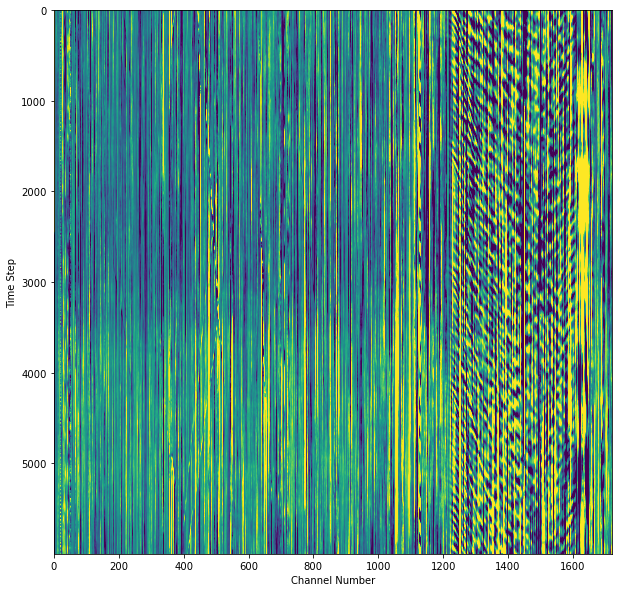

In [14]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,10))
plt.imshow(data,aspect='auto',vmin=-1,vmax=1)
plt.xlabel('Channel Number')
plt.ylabel('Time Step')
plt.show()